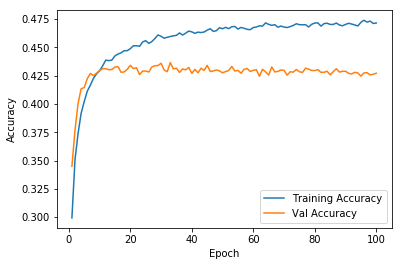

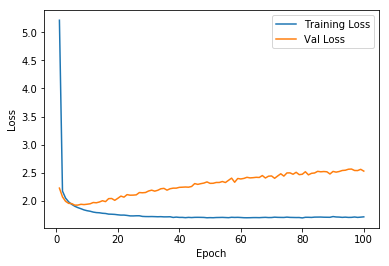

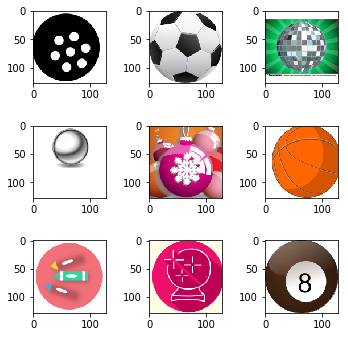

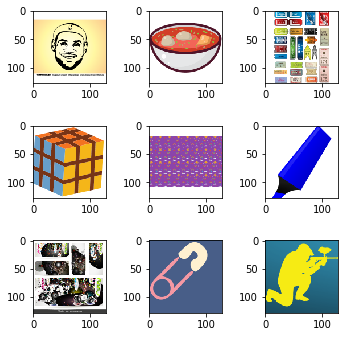

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys

import numpy as np
import matplotlib.pyplot as plt
import os, sys

DATA_SOURCE = '../reports/trainings/class_data/'
MODEL_STATE_DATA = 'model_state_data/'
PLOT_DATA = 'plot_data'
#['acc_scores.txt', 'loss.txt', 'val_acc_pr_epoch.txt', 'val_loss_pr_epoch']


ACC_SCORES = []
VAL_ACC_SCORES = []
LOSS = []
VAL_LOSS = []

with open(DATA_SOURCE + PLOT_DATA + '/loss.txt', 'r') as file:
	for i in file.readlines():
		LOSS.append(i.strip('\n'))

with open(DATA_SOURCE + PLOT_DATA + '/val_loss_pr_epoch', 'r') as file:
	for i in file.readlines():
		VAL_LOSS.append(i.strip('\n'))

with open(DATA_SOURCE + PLOT_DATA + '/acc_scores.txt', 'r') as file:
	for i in file.readlines():
		ACC_SCORES.append(i.strip('\n'))

with open(DATA_SOURCE + PLOT_DATA + '/val_acc_pr_epoch.txt', 'r') as file:
	for i in file.readlines():
		VAL_ACC_SCORES.append(i.strip('\n'))

VAL_LOSS = np.array(VAL_LOSS).astype(np.float)
LOSS = np.array(LOSS).astype(np.float)
ACC_SCORES = np.array(ACC_SCORES).astype(np.float)
VAL_ACC_SCORES = np.array(VAL_ACC_SCORES).astype(np.float)

Y =  range(1, len(ACC_SCORES) + 1)

###### Visualization of train_acc/val_acc vs epochs ###### 

plt.plot(Y, ACC_SCORES)
plt.plot(Y, VAL_ACC_SCORES)
plt.legend(['Training Accuracy', 'Val Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

###### Visualization of train_loss/val_loss vs epochs ######

plt.plot(Y, LOSS)
plt.plot(Y, VAL_LOSS)
plt.legend(['Training Loss', 'Val Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

###### Visualization of desirable and undesirable images ######
import matplotlib.image as mpimg

IMG_SOURCE_DES = '../data/imshow_data/desirable'
IMG_SOURCE_UNDES ='../data/imshow_data/not_desirable'
BALL = '/ball'

def get_image_names(path):

	tmpList = []

	for img_name in os.listdir(path):
		tmp = mpimg.imread(path + '/' + img_name)
		tmpList.append(tmp)
	return tmpList

def plot_images(images):
	fig=plt.figure(figsize=(5, 5))
	
	for i in range(1, 10):
		img = images[i]
		fig.add_subplot(3, 3, i)
		fig.tight_layout()
		plt.imshow(img)
	plt.show()

#Ball images
ball_desirable_data = get_image_names(IMG_SOURCE_DES + BALL)
ball_undesirable_data = get_image_names(IMG_SOURCE_UNDES + BALL)

plot_images(ball_desirable_data)
plot_images(ball_undesirable_data)

#TODO, make two more 



###### TODO ######
# Visualize the follow
# - Display the overlap of class labels in: (Pref as print and visualization) 
#		* MTurk-classes
#		* Training-classes
# - Distrubution of images and labels (Pref as bar graph and print)
# - Display desirable and undesirable images(Pref for 2-3 classes + 10-15 images each)
# - Display the full CNN (Model.summary()) 
# What characterizes personalities of Graphic designs? University of hong kong
# Predict ca 100 desirable images on 50% model.
# dont use "we did this" use, this were applied to the dataset.
# Reference to imagenet, explain how imagenet is trained with a paragraph.
# Implementations of tool after methods. Short explain the tools.
# Find research articles and see how they are built up. 
#  
# 
# 
# 
# 


In [27]:
from pathlib import Path
def get_clean_subcat_size():
    dataset_path = Path("../data/processed/cleaned_categories")
    test_dir = dataset_path.joinpath("test")
    train_dir = dataset_path.joinpath("train")
    categories = []


    for dir in test_dir.iterdir():
        image_count = 0
        for pfile in dir.iterdir():
            if pfile.is_file():
                image_count += 1
        categories.append({"label": dir.name, "image_count": image_count})
    for dir in train_dir.iterdir():
        image_count = 0
        for pfile in dir.iterdir():
            if pfile.is_file():
                image_count += 1
        for dct in categories:
            if dct["label"] == dir.name:
                dct["image_count"] += image_count
    return categories

In [28]:
import pandas as pd

In [29]:
var = get_clean_subcat_size()
print(var)

[{'label': 'common_categories', 'image_count': 0}, {'label': 'ball', 'image_count': 3427}, {'label': 'people', 'image_count': 11355}, {'label': 'tree', 'image_count': 3534}, {'label': 'hand', 'image_count': 3773}, {'label': 'car', 'image_count': 574}, {'label': 'icons', 'image_count': 20364}, {'label': 'bird', 'image_count': 1873}, {'label': 'food', 'image_count': 4683}, {'label': 'nature', 'image_count': 5406}, {'label': 'pattern', 'image_count': 3560}, {'label': 'background', 'image_count': 11068}, {'label': 'floral', 'image_count': 3561}, {'label': 'heart', 'image_count': 1550}]


In [43]:
df = pd.DataFrame(get_clean_subcat_size())
df = df.set_index("label")

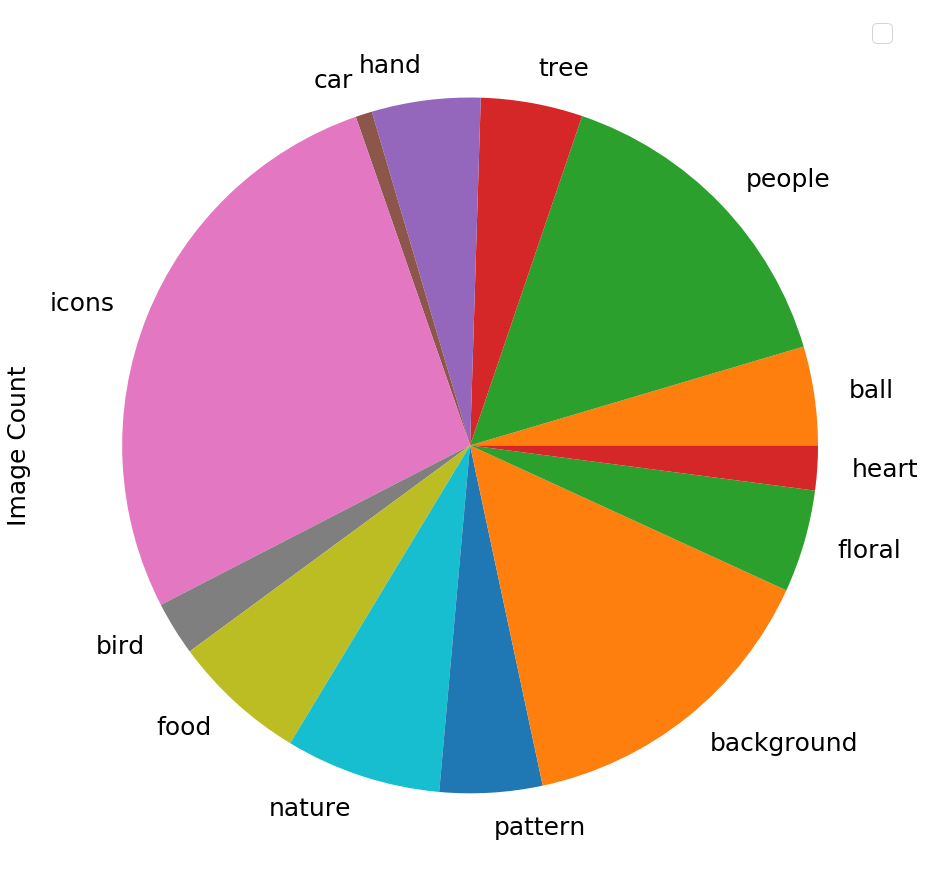

In [57]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 25.0
ax = df.plot.pie(y='image_count', figsize=(16, 16))
ax.legend("")
ax.set_ylabel('Image Count')
plt.show()